In [23]:
from tools.functions import *
from generate_data import *

In [24]:
output_base_model = load_output("output_2023-05-12_base")
output_sparse_model = load_output("output_10_ageing_1000_2023-05-18")
output = output_base_model

In [25]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented

off_time = 1 # How many stimulus periods are used for recoverey period histogram

Mv_loaded = output["Mv"]
Mh_loaded = output["Mh"]
time_test_on = output["time_test_on"]
time_points_dict = output["time_points_dict"]
n_seed_patterns = output["n_seed_patterns"]
n_prototype_per_seed = output["n_prototype_per_seed"]
n_variations_per_prototype = output["n_variations_per_prototype"]
after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                binarize = True, threshold = 100)

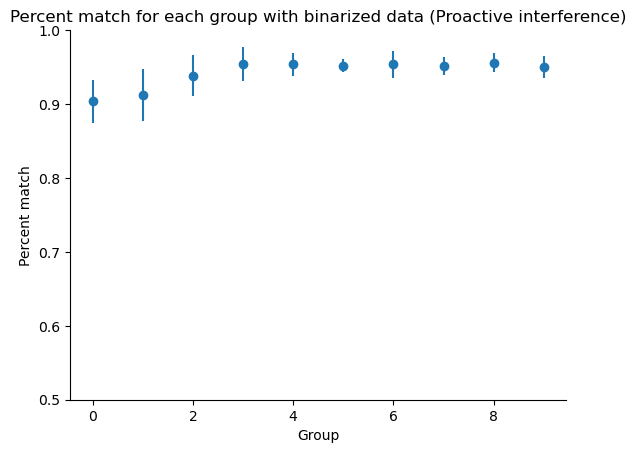

In [26]:
hd_table_between = np.array(hamming_distances[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
pm_table_between = np.array(percent_match[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
means_between = np.mean(pm_table_between, axis=1)
stds_between = np.std(pm_table_between, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_between, stds_between, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Proactive interference)")
ax.spines['right'].set_visible(False)
plt.ylim(0.5, 1)
plt.show()


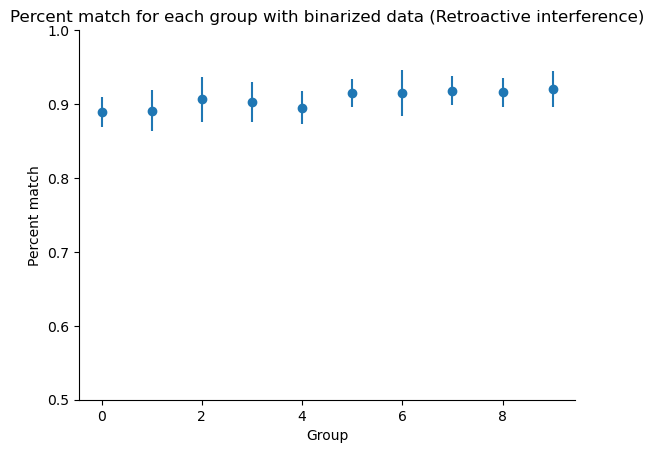

In [27]:
hd_table_within = np.array(hamming_distances[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
pm_table_within = np.array(percent_match[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
means_within = np.mean(pm_table_within, axis=1)
stds_within = np.std(pm_table_within, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_within, stds_within, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Retroactive interference)")
ax.spines['right'].set_visible(False)
plt.ylim(0.5, 1)
plt.show()

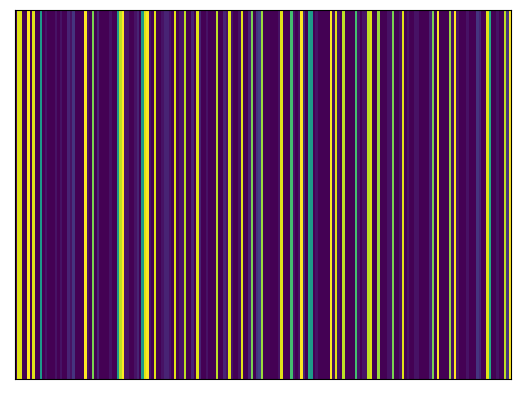

In [28]:
t_1 = time_test_on[94]
timepoint_s_1 = time_points_dict["T"+str(t_1)+"_s"]
timepoint_e_1 = time_points_dict["T"+str(t_1)+"_e"]

fig, ax = plt.subplots()
plt.imshow(spike_histogram(Mv_loaded, timepoint_s_1, timepoint_e_1).T[1].reshape(1, 200), aspect="auto", interpolation="none")
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [29]:
tst = pattern_separation_efficacy_model(Mv_loaded, Mh_loaded, time_points_dict, n_seed_patterns, 
                                        n_prototype_per_seed, after_split_n_per_prototype_test, time_test_on,
                                        selection = "group", convert_to_hz=True, to_binary=False, threshold=10, report=False)

In [30]:
np.mean(np.mean(tst, axis=0)[np.mean(tst, axis=0) != 0])

0.8469577349618422

Sparse model

In [31]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented
output = output_sparse_model

off_time = 1 # How many stimulus periods are used for recoverey period histogram

Mv_loaded = output["Mv"]
Mh_loaded = output["Mh"]
time_test_on = output["time_test_on"]
time_points_dict = output["time_points_dict"]
n_seed_patterns = output["n_seed_patterns"]
n_prototype_per_seed = output["n_prototype_per_seed"]
n_variations_per_prototype = output["n_variations_per_prototype"]
after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                binarize = True, threshold = 100)

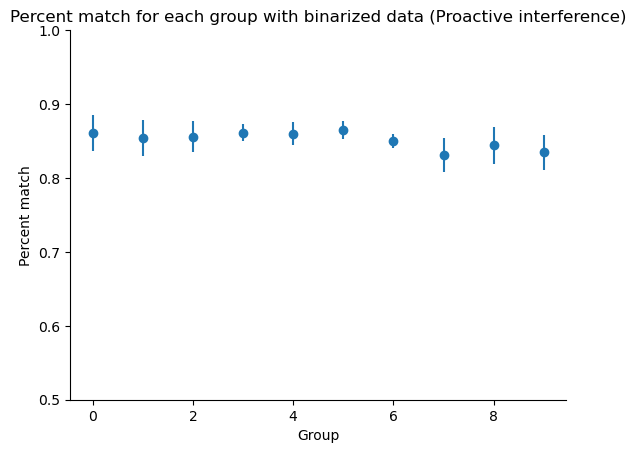

In [32]:
hd_table_between = np.array(hamming_distances[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
pm_table_between = np.array(percent_match[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
means_between = np.mean(pm_table_between, axis=1)
stds_between = np.std(pm_table_between, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_between, stds_between, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Proactive interference)")
ax.spines['right'].set_visible(False)
plt.ylim(0.5, 1)
plt.show()



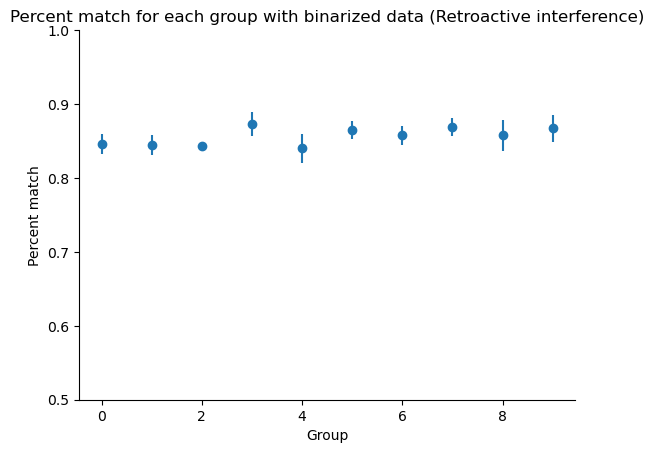

In [33]:
hd_table_within = np.array(hamming_distances[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
pm_table_within = np.array(percent_match[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
means_within = np.mean(pm_table_within, axis=1)
stds_within = np.std(pm_table_within, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_within, stds_within, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Retroactive interference)")
ax.spines['right'].set_visible(False)
plt.ylim(0.5, 1)
plt.show()


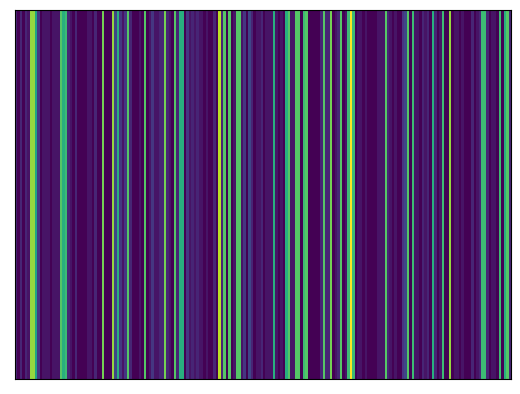

In [34]:
t_1 = time_test_on[94]
timepoint_s_1 = time_points_dict["T"+str(t_1)+"_s"]
timepoint_e_1 = time_points_dict["T"+str(t_1)+"_e"]

fig, ax = plt.subplots()
plt.imshow(spike_histogram(Mv_loaded, timepoint_s_1, timepoint_e_1).T[1].reshape(1, 200), aspect="auto", interpolation="none")
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [35]:
tst = pattern_separation_efficacy_model(Mv_loaded, Mh_loaded, time_points_dict, n_seed_patterns, 
                                        n_prototype_per_seed, after_split_n_per_prototype_test, time_test_on,
                                        selection = "group", convert_to_hz=True, to_binary=False, threshold=10, report=False)

In [36]:
np.mean(np.mean(tst, axis=0)[np.mean(tst, axis=0) != 0])

0.3739509892419207